# Earthquake Occurrence Statistics: Gutenberg-Richter Law

Declustering seismic data.

**In class we:**
- Loaded a Bay Area seismic catalog around the Loma Prieta Quake.
- Computed the distance and time interval between Loma Prieta quake and subsequant earthquakes to indentify aftershocks.
- Filtered the aftershocks from the catalog and looked at their distribution.

**In this homwork:**
- Load a Bay Area seismic catalog since 1900.
- Define a function that uses a `for` loop to identify aftershocks for all the main shock events.
- Remove the aftershocks from the catalog (decluster).
- Explore the distribution of main shock events.
- Examine annual earthquake rate and recurrence interval

## Setup

Run this cell as it is to setup your environment.

In [1]:
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

The frequency of earthquake recurrence as a function of magnitude has been a focus of seismological research since Gutenberg and Richter's pioneering work (Gutenberg and Richter, 1949). The evidence shows that the numbers of earthquakes in a given time period scales logarthmically with magnitude. To first order there are 10 times more magnitude 5 earthquakes compared to magnitude 6 events, and 10 times more magnitude 4 earthquakes compared to magnitude 5 quakes.

Gutenberg and Richter found that when the base-10 logarithm of the number of earthquakes is plotted vs. magnitude that the distribution may be plotted as the line, log10(N)=A+Bm, where N is the number of earthquakes, m is the magnitude and A and B are the slope and intercept of a line. For the example described above the B-value is equal to -1 (there are 10 times fewer earthquakes for an increase of one magnitude unit). An important point to keep in mind that these parameters are based on a primary earthquake catalog in which aftershocks have been removed. **The process of aftershock removal is called declustering.**

Why is this important? The A- and B-values are often used to characterize the rates of earthquakes to use in earthquake forecasting and can be a distinguising characteristic of different classes of earthquakes. The B-value (slope parameter) is often used to distinquish between 'normal' and 'swarm-like' earthquake behavior. In geothermal areas it has been observed that the earthquake distribution is richer in small earthquakes indicating a B-value significantly less than -1. 

Gutenberg Richter is also used to characterize seismic hazard in a region by defining the annual rate of earthquake occurrence. In this notebook you will analyze an earthquake catalog downloaded from the Northern California Earthquake Data Center from around the Berkeley Campus. You will learn how to decluster the seismicity catalog, estimate the Gutenberg Richter A- and B- values, and estimate the annual recurrence rates of large earthquake in the region.

## Load the Earthquake Catalog

Load the .csv data file 'data/bay_area_anss_1900_2020.csv' of all the earthquakes 1900 - 2020 in the ANSS (Advanced National Seismic System) catalog from around Berkeley (latitudes 37.0-38.75° and longitude -123.35 to -121.5°; [http://ncedc.org/anss/catalog-search.html](http://ncedc.org/anss/catalog-search.html)). Convert the column DateTime to a datetime object with `pd.to_datetime`.

In [2]:
# read data
bay_catalog=pd.read_csv('./data/bay_area_anss_1900_2020.csv')
bay_catalog['DateTime'] = pd.to_datetime(bay_catalog['DateTime'])
bay_catalog.head()

,Unnamed: 0,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,0,1910-01-01 00:00:00,37.83,-122.25,NaN,NaN,Unk,NaN,NaN,NaN,NaN,BK,NaN
1,1,1910-02-26 05:55:00,37.75,-122.25,NaN,NaN,Unk,NaN,NaN,NaN,NaN,BK,NaN
2,2,1910-02-26 19:50:00,37.75,-122.25,NaN,NaN,Unk,NaN,NaN,NaN,NaN,BK,NaN
3,3,1910-02-28 21:30:00,37.75,-122.25,NaN,NaN,Unk,NaN,NaN,NaN,NaN,BK,NaN
4,4,1910-03-11 00:00:00,37.00,-121.58,NaN,NaN,Unk,NaN,NaN,NaN,NaN,BK,NaN


In [3]:
#  create data arrays, it will speed up our loops later
year=bay_catalog['DateTime'].dt.year
month=bay_catalog['DateTime'].dt.month
day=bay_catalog['DateTime'].dt.day
lat=bay_catalog['Latitude'].values
lon=bay_catalog['Longitude'].values
mag=bay_catalog['Magnitude'].values
nevt=len(year)        #number of events 

<font color=darkred>**_Concept question:_**</font> How many total events are in this catalog before we remove the aftershocks?

**Write your answer here.**

In [4]:
print(f'There are {nevt:d} events in the catalog')

There are 74961 events in the catalog


## Map the Raw Earthquake Catalog

On a map of the Bay Area plot the location of events in the raw catalog. Scale the marker color and size by magnitude. Add a colorbar with a label. 

<font color=goldenrod>**_Code for you to write_**</font>

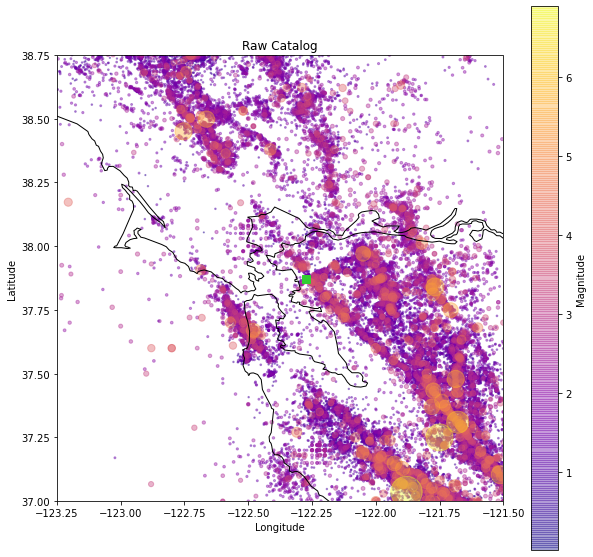

In [5]:
#Make a Map of the earthquake catalog

# Set Corners of Map
lat0=37.0
lat1=38.75
lon0=-123.25
lon1=-121.5
tickstep=0.25 #for axes
latticks=np.arange(lat0,lat1+tickstep,tickstep)
lonticks=np.arange(lon0,lon1+tickstep,tickstep)

# coordinates for UC Berkeley
Berk_lat = 37.8716
Berk_lon = -122.2727

# make plot object with ticks, coastlines, etc.
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon0, lon1, lat0, lat1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1)
ax.set_xticks(lonticks)
ax.set_yticks(latticks, crs=ccrs.PlateCarree())
ax.set(xlabel='Longitude', ylabel='Latitude',title='Raw Catalog')


# Sort by magnitude to plot largest events on top
bay_catalog_sorted = bay_catalog.sort_values(by='Magnitude')
#exponent to scale marker size
z=np.exp(bay_catalog_sorted['Magnitude'])

plt.scatter(bay_catalog_sorted['Longitude'], bay_catalog_sorted['Latitude'], s=z, c=bay_catalog_sorted['Magnitude'], cmap='plasma',alpha=0.4,marker='o') # plot circles on EQs
plt.plot(Berk_lon,Berk_lat,'s',color='limegreen',markersize=8)  # plot green square on Berkeley Campus
plt.colorbar(label='Magnitude')

plt.show()

## Plot Magnitude vs. Time for the Raw Catalog

Plot magnitude vs. time for the raw catalog as we did in class. Use the `alpha = 0.2` argument in `plot` to make the markers transparent. Add labels and a title.

<font color=goldenrod>**_Code for you to write_**</font>

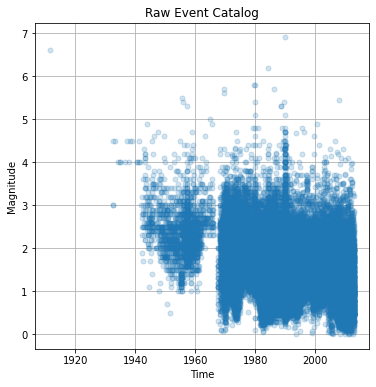

In [6]:
# plot magnitude vs. time
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(mdates.date2num(bay_catalog['DateTime']), bay_catalog['Magnitude'],'o',alpha=0.2,markersize=5)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set(xlabel='Time', ylabel='Magnitude',
       title='Raw Event Catalog')
ax.grid()
plt.show()


<font color=darkred>**_Concept questions:_**</font> The first event in the catalog is a few years after the Great 1906 San Francisco Earthquake. Read a bit about it here [The Great 1906 San Francisco Earthquake](https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/). That event inspired scientists to start recording the earthquake catalog. But early instruments for measuring earthquakes were not as good as modern seismometers. When are there events missing from this catalog i.e. are there large gaps?

**Write your answer here.**

There are gaps between 1910 to approximately 1930 and around 1965.

## Plot Histogram of Magnitude for the Raw Catalog

Plot a histogram of the magnitudes in the raw catalog, with a log y-axis. Be sure to label your axes.

<font color=goldenrod>**_Code for you to write_**</font>

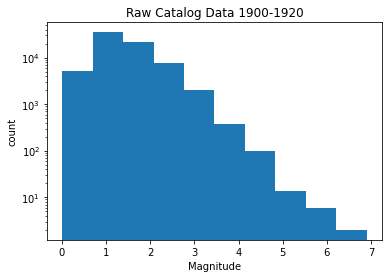

In [7]:
# plot a histogram
ax=plt.hist(bay_catalog['Magnitude'],10, log='True')
plt.ylabel('count')
plt.xlabel('Magnitude')
plt.title('Raw Catalog Data 1900-1920')
plt.show()


### Compute the B-value of the Gutenberg-Richter Law for the raw catalog

 

In [8]:
# the observed log10 number of events per year as function of magnitude (data)
min_mag=0.0
max_mag=6.9
m_raw=np.arange(min_mag,max_mag,0.1)
N_raw=np.zeros(len(m_raw))
numyr=2020-1910
for i in range(0,len(m_raw),1):
    N_raw[i]=np.log10(np.count_nonzero(mag >= m_raw[i]))
    

### Use the polyfit() function as done in class to determine the B-value.

How does the value compare to what was found in class? 

**Write your answer here**

Note that we should not use this B-value for characterizing hazard since it is biased by the large number of aftershocks in the catalog. Next we will decluster the catalog as was done in class.

In [9]:
# Solve for Model Parameters (A- and B-values)
y=np.polyfit(m_raw,N_raw,1)
print(f'Preliminary G&R has intercept={y[1]:.3f} slope={y[0]:.3f}')



Preliminary G&R has intercept=5.465 slope=-0.811


### Define the haversine function to compute distance

You will need to call this function to compute the distance between each event in the catalog and future earthquakes for possible identification as aftershocks.

In [10]:
#Do Not Modify this Cell
#This function computes the spherical earth distance between to geographic points and is used in the
#declustering algorithm below
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.
    
    The first pair can be singular and the second an array

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2]) # convert degrees lat, lon to radians

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2  # great circle inside sqrt

    c = 2 * np.arcsin(np.sqrt(a))   # great circle angular separation
    km = 6371.0 * c   # great circle distance in km, earth radius = 6371.0 km
    return km

## Now develop code to decluster the catalog as demonstrated in class

- First compute the number of days from the first event in the catalog to all subsequent earthquakes

- Then apply the Gardner and Knopoff (1974) time/distance window method to identify aftershocks and remove them from the catalog.



#### This is a reminder of the time and distance equations of the Gardner and Knopoff (1974) method

<img src="Figures/window_approx.png" >

In [11]:
#Write your code here to compute the 'days' array that will be used in the declustering
#algorithm

days=np.zeros(nevt) # initialize the size of the array days

d0=datetime.date(year[0], month[0], day[0])
for i in range(0,nevt,1):
    d1=datetime.date(year[i], month[i], day[i])
    days[i]=(d1 - d0).days


## Declustering Algorithm Time!

You'll build a `for` loop for indentifying aftershocks in the seismic catalog. In-class we just found the aftershocks for one main shock event. Here you will add a `for` loop that iterates through the whole catalog and finds all events that can be cassified as aftershocks. Replace the xxx's in the code below:

<font color=goldenrod>**_Code for you to write_**</font>

In [12]:
#Decluster the Catalog  Note: This cell may take a few minute to complete
cnt=0 # initialize a counting variable
save=np.zeros(10000000,dtype='int') # initialize a counting variable
for i in range(0,nevt,1):   # step through EQ catalog
    # logical if statements to incorporate definitions of Dtest and Ttest aftershock window bounds
    Dtest=np.power(10,0.1238*mag[i]+0.983)
    if (mag[i] >= 6.5):
        Ttest=np.power(10,0.032*mag[i]+2.7389)
    else:
        Ttest=np.power(10,0.5409*mag[i]-0.547)
    
    a=days[i+1:nevt]-days[i]    # time interval in days to subsequent earthquakes in catalog
    m=mag[i+1:nevt]   # magnitudes of subsequent earthquakes in catalog
    b=haversine_np(lon[i],lat[i],lon[i+1:nevt],lat[i+1:nevt]) # distance in km to subsequent EQs in catalog
    
    icnt=np.count_nonzero(a <= Ttest)   # counts the number of potential aftershocks, 
                                        # the number of intervals <= Ttest bound
    if icnt > 0:  # if there are potential aftershocks
        itime=np.array(np.nonzero(a <= Ttest)).transpose() + (i+1) # indices of potential aftershocks <= Ttest bound
        for j in range(0,icnt,1):   # loops over the aftershocks         
            if b[j] <= Dtest and m[j] < mag[i]: # test if the event is inside the distance window 
                                                # and that the event is smaller than the current main EQ
                save[cnt]=itime[j]  # index value of the aftershock
                cnt += 1 # increment the counting variable

                
af_ind=np.delete(np.unique(save),0)   # This is an array of indexes that will be used to delete events flagged 
                                      # as aftershocks    


Use `np.delete(array,indices_to_delete)` to delete the aftershock events which are located at indexes `af_ind` from your original arrays. You can also use `dataframe_name.drop(indices_to_delete,axis=0)` to delete rows from a DataFrame.

<font color=goldenrod>**_Code for you to write_**</font>

In [23]:
# delete the aftershock events
declustered_df = bay_catalog.drop(af_ind,axis=0)
declustered_days=np.delete(days, af_ind)  #The aftershocks are deleted from the days array 
declustered_mag=np.delete(mag, af_ind)  #The aftershocks are deleted from the mag array 
declustered_lon=np.delete(lon, af_ind)  #The aftershocks are deleted from the lon array 
declustered_lat=np.delete(lat, af_ind)  #The aftershocks are deleted from the lat array 
n=len(declustered_days)
n

27398

<font color=darkred>**_Concept question:_**</font> How many of the raw events catalog were main-shocks vs. after-shocks?

**Write your answer here.**

In [14]:
numaft=n
nummain=nevt-numaft
print(f'Total {nevt:d} events Mainshocks={nummain:d}  Aftershocks={numaft:d}')

Total 74961 events Mainshocks=47563  Aftershocks=27398


## Plot Magnitude vs. Time for the Declustered catalog

Plot magnitude vs. time for the raw catalog and add on top the declustered catalog with slightly larger markers, so the main-shocks in the raw catalog are covered and the aftershocks remain. Add a legend to label the two sets of markers. Add labels and a title.

<font color=goldenrod>**_Code for you to write_**</font>

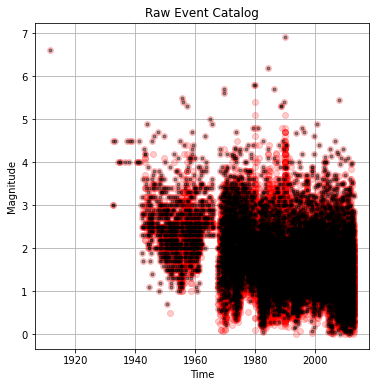

In [15]:
# plot magnitude vs. time
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(mdates.date2num(bay_catalog['DateTime']), bay_catalog['Magnitude'],'o',alpha=0.2,color='red',markersize=6)
ax.plot(mdates.date2num(declustered_df['DateTime']), declustered_df['Magnitude'],'o',alpha=0.4, color='black',markersize=3)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set(xlabel='Time', ylabel='Magnitude',
       title='Raw Event Catalog')
ax.grid()
plt.show()

<font color=darkred>**_Concept question:_**</font> At approximately what dates (or in days since first EQ) do you observe a large aftershock sequence?

**Write your answer here.**

Approximately 1955, 1980, 1989

## Plot Histogram of Magnitude for the Declustered Catalog

Plot a histogram of the magnitudes in the raw catalog, with a log y-axis. Add a histogram of the declustered catalog on top to compare. Add a legend to label the two datasets. Add labels and a title.

<font color=goldenrod>**_Code for you to write_**</font>

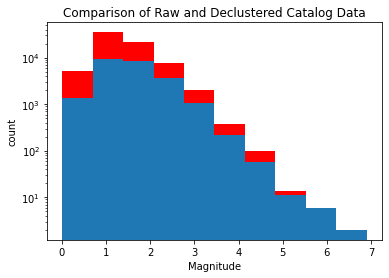

In [16]:
# plot a histogram
ax=plt.hist(bay_catalog['Magnitude'],10, color='red',log='True')
ax=plt.hist(declustered_df['Magnitude'],10, log='True')
plt.ylabel('count')
plt.xlabel('Magnitude')
plt.title('Comparison of Raw and Declustered Catalog Data')
plt.show()

### Compute the B-value of the Gutenberg-Richter Law for the declustered catalog

<font color=goldenrod>**_Code for you to write_**</font>

In [17]:
# Write code here to first determine the Gutenberg-Richter distribution (log10(N) vs magnitude_bin)
# Then fit a line to the data to determine A- and B-values. Only fit the portion of the data
# That is representative of a 'completeness' (i.e. the portion of the distribution that 
# behaves linearly). Do this 'filtering' before solving for the A- and B- values will give a
# more robust result

# Besure to make a plot that compares your Gutenberg-Richter line fit to the declustered catalog
# Data

G&R: Intercept=3.266  Slope=-0.797


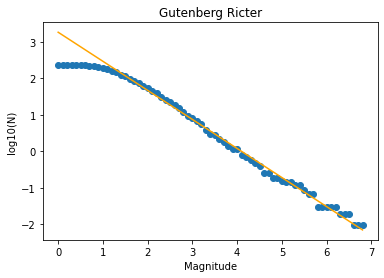

In [18]:
###### Compute G&R Statistics
min_mag=0.0
max_mag=6.9

m=np.arange(min_mag,max_mag,0.1)    #The magnitude "bins"
N=np.zeros(len(m))                  #N is the number of events
numyr=max(year) - min(year) + 1     #number of years in the catalog - note 6 years is too low for this analysis

for i in range(0,len(m),1):
    N[i]=np.log10(np.count_nonzero(declustered_mag >= m[i])/numyr)

#Fit G&R Model
#y=np.polyfit(m,N,1)
y=np.polyfit(m[(m >=1.5)],N[(m >=1.5)],1)
print(f'G&R: Intercept={y[1]:.3f}  Slope={y[0]:.3f}')

#Now Plot
plt.figure()
plt.plot(m,N,'o')
plt.plot(m,y[1]+y[0]*m,'-',color='orange')
plt.xlabel('Magnitude')
plt.ylabel('log10(N)')
plt.title('Gutenberg Ricter')
plt.show()

**Compare and discuss the differences between the raw and declustered data and the estimated G&R model parameters**

**Write answer here**

The histogram comparison shows that more events are removed for smaller magnitude than larger magnitude. This is consistent with the concept of afteshock declustering. The removal of the smaller aftershocks lessens the B-value of the G&R relationship.

## Map the Declustered Earthquake Catalog

On a map of the Bay Area plot the location of events in the declustered catalog. Scale the marker color and size by magnitude. You'll also add the locations of major faults in the area.

In [19]:
#Load locations of faults to add to our map
a=pd.read_table('data/Hayward.txt') 
hay_lon=a['x'].values
hay_lat=a['y'].values

a=pd.read_table('data/San_Andreas.txt') 
SA_lon=a['x'].values
SA_lat=a['y'].values

a=pd.read_table('data/San_Gregorio.txt') 
SG_lon=a['x'].values
SG_lat=a['y'].values

a=pd.read_table('data/Calaveras.txt') 
cal_lon=a['x'].values
cal_lat=a['y'].values

a=pd.read_table('data/Hunting_Creek.txt') 
HC_lon=a['x'].values
HC_lat=a['y'].values

a=pd.read_table('data/Rodgers_Creek.txt') 
RC_lon=a['x'].values
RC_lat=a['y'].values

a=pd.read_table('data/Concord.txt') 
con_lon=a['x'].values
con_lat=a['y'].values

a=pd.read_table('data/Greenville.txt') 
grn_lon=a['x'].values
grn_lat=a['y'].values

a=pd.read_table('data/Maacama.txt') 
m_lon=a['x'].values
m_lat=a['y'].values

Plot map of main shock events with the marker size and color scaled and sorted by magnitude, and plot the fault locations on top. Add a legend.

<font color=goldenrod>**_Code for you to write_**</font>

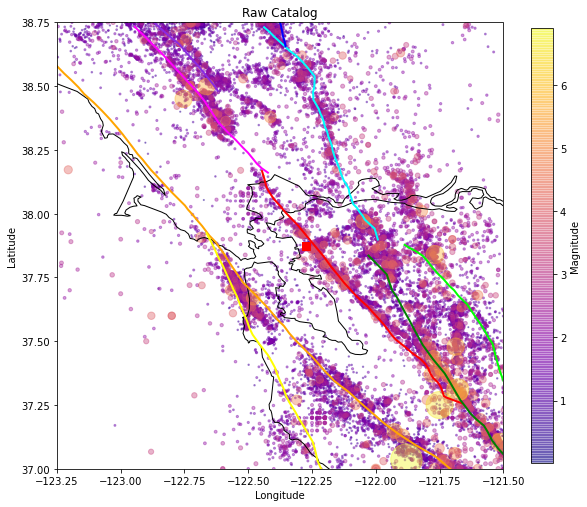

In [20]:
#Make a Map of the earthquake catalog

# Set Corners of Map
lat0=37.0
lat1=38.75
lon0=-123.25
lon1=-121.5
tickstep=0.25 #for axes
latticks=np.arange(lat0,lat1+tickstep,tickstep)
lonticks=np.arange(lon0,lon1+tickstep,tickstep)

# coordinates for UC Berkeley
Berk_lat = 37.8716
Berk_lon = -122.2727


# make plot object with ticks, coastlines, etc.
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon0, lon1, lat0, lat1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1)
ax.set_xticks(lonticks)
ax.set_yticks(latticks, crs=ccrs.PlateCarree())
ax.set(xlabel='Longitude', ylabel='Latitude',title='Raw Catalog')


# Sort by magnitude to plot largest events on top
declustered_sorted = declustered_df.sort_values(by='Magnitude')
#exponent to scale marker size
z=np.exp(declustered_sorted['Magnitude'])

plt.scatter(declustered_sorted['Longitude'], declustered_sorted['Latitude'], s=z, c=declustered_sorted['Magnitude'], cmap='plasma',alpha=0.4,marker='o') # plot circles on EQs
plt.plot(Berk_lon,Berk_lat,'s',color='limegreen',markersize=8)  # plot green square on Berkeley Campus



#Plot faults

plt.plot(hay_lon,hay_lat,'-',color='red',linewidth=2,label='Hayward Fault')
plt.plot(SA_lon,SA_lat,'-',color='orange',linewidth=2,label='San Andreas Fault')
plt.plot(SG_lon,SG_lat,'-',color='yellow',linewidth=2,label='San Gregorio Fault')
plt.plot(cal_lon,cal_lat,'-',color='green',linewidth=2,label='Calaveras Fault')
plt.plot(con_lon,con_lat,'-',color='cyan',linewidth=2,label='Concord Fault')
plt.plot(grn_lon,grn_lat,'-',color='lime',linewidth=2,label='Greenville Fault')
plt.plot(m_lon,m_lat,'-',color='blueviolet',linewidth=2,label='Maacama Fault')
plt.plot(RC_lon,RC_lat,'-',color='magenta',linewidth=2,label='Rodgers Creek Fault')
plt.plot(HC_lon,HC_lat,'-',color='blue',linewidth=2,label='Hunting Creek Fault')
plt.plot(Berk_lon,Berk_lat,'rs',markersize=8,label='UC Berkeley')  # plot red square on Berkeley Campus
plt.colorbar(shrink=0.8,label='Magnitude')

plt.show()

<img src="Figures/fault_map.png" width=550>
Map of Bay Area faults. 
Source: https://pubs.er.usgs.gov/publication/fs20163020

<font color=darkred>**_Concept question:_**</font> What faults have historically been active since 1911? What mapped bay-area fault has the highest probability of rupturing with M$\geq6.7$ in the near future?

**Write your answer here.**

The Hayward fault

### Earthquake recurrence in the San Francisco Bay Area

Based on the 120 year declustered catalog estimate the average recurrence interval for magnitude 5.0, 6.0, 7.0 and 8.0 events in the San Francisco Bay Area. Note that when compiling the G&R data it should have been 'annualized' by dividing by the number of years in the catalog. Then the recurrence interval in years is simply 1/annual_rate.

How reasonable do you think these recurrence intervals are, and what do they imply about the likelihood of larger earthquake occurrence in the San Francisco Bay Area (you may want to consider when previous large earthquake occurred, i.e. https://www.usgs.gov/natural-hazards/earthquake-hazards/science/back-future-san-andreas-fault?qt-science_center_objects=0#qt-science_center_objects). What kind of data helps inform on earthquake recurrence allowing us to look earlier in time than catalog statistics allows?

**Write answer here**

The calculations are reasonable up to M7. The ~1,200 years for M8 is an overestimate as the USGS reports the average recurrence interval for M8 San Andreas events is approximately ~200-300 years (https://www.usgs.gov/natural-hazards/earthquake-hazards/science/back-future-san-andreas-fault?qt-science_center_objects=0#qt-science_center_objects).

The overestimate comes from extrapolation of a sparse dataset. To capture effectively 200 year recurrence we would need a much longer catalog of events than is available.




In [21]:
print(f'Recurrence Intervals')
print(f'M5={1/np.power(10,y[1]+y[0]*5.0):.1f} years')
print(f'M6={1/np.power(10,y[1]+y[0]*6.0):.1f} years')
print(f'M7={1/np.power(10,y[1]+y[0]*7.0):.1f} years')
print(f'M8={1/np.power(10,y[1]+y[0]*8.0):.1f} years')

Recurrence Intervals
M5=5.2 years
M6=32.6 years
M7=204.3 years
M8=1279.5 years


### Turn in this notebook

Save your completed notebook as a pdf file and upload to bcourses.